<a href="https://colab.research.google.com/github/ar-five5/mL_Project/blob/main/Part_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 	Part 3: Salary Prediction (Regression)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
import os

# Loading data and exploring data to understand the content

In [9]:
curr_dir = os.getcwd()
df = pd.read_csv('IBM_HR_Analytics_and_Employee_Attrition.csv')

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [48]:
df.shape
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Increment,FutureSalary
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,1.057687,6876.613231
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.018041,4978.967812
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.050000,1059.450000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.050000,3080.175000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1.050000,5216.925000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1.050000,8797.950000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.100000,21970.300000


In [13]:
df.isnull().sum()  # To check that our dataset does not contain any null entries

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [15]:
# Simulating future salary based on performance rating
df['Increment'] = np.where(df['PerformanceRating'] == 4, 1.10, 1.05)  # 10% increase for high performers and 5% increase for
df['FutureSalary'] = df['MonthlyIncome'] * df['Increment']  # Apply increment

In [38]:
## use encoder to convert the columns with textual data into numerical/int data by assinging each type of text with a number
df_encoded = pd.get_dummies(df, drop_first=True)

In [45]:
# Setting target variable (future salary) and features
Y = df_encoded['FutureSalary']
X = df_encoded.drop(columns=['FutureSalary'])
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=76)
print(X.shape,X_train.shape,X_test.shape)

(1470, 49) (1029, 49) (441, 49)


#Future Salary Distribution by Performance Rating

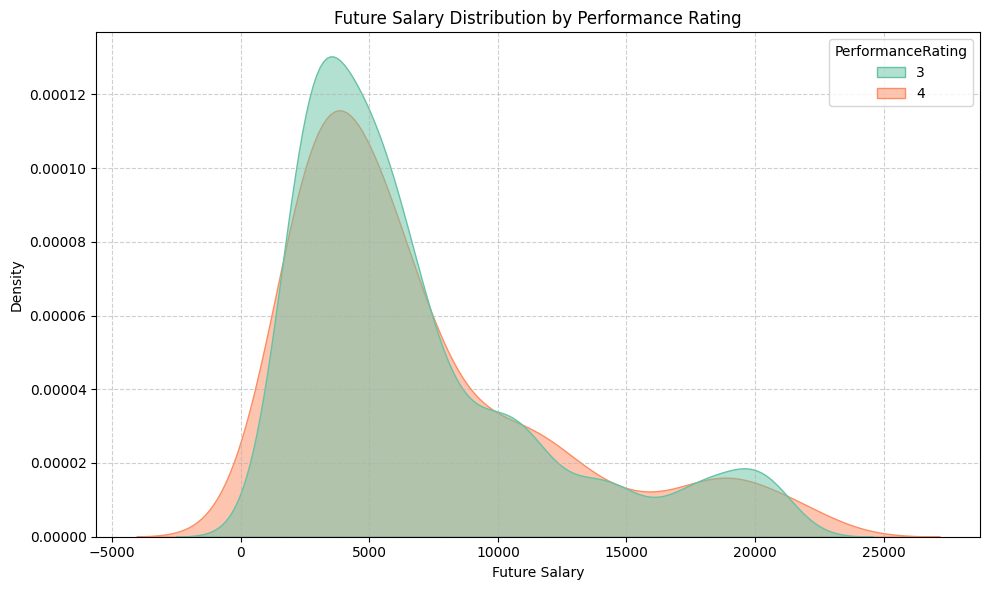

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='FutureSalary', hue='PerformanceRating', fill=True, palette='Set2', common_norm=False, alpha=0.5)
plt.title('Future Salary Distribution by Performance Rating')
plt.xlabel('Future Salary')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [21]:
# Initializing and training Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=76)
random_forest_model.fit(X_train, Y_train)
random_forest_predictions = random_forest_model.predict(X_test)

In [22]:
# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest_model.feature_importances_
})
top_features = feature_importance.sort_values('Importance', ascending=False).head(10)

#Correlation Heatmap

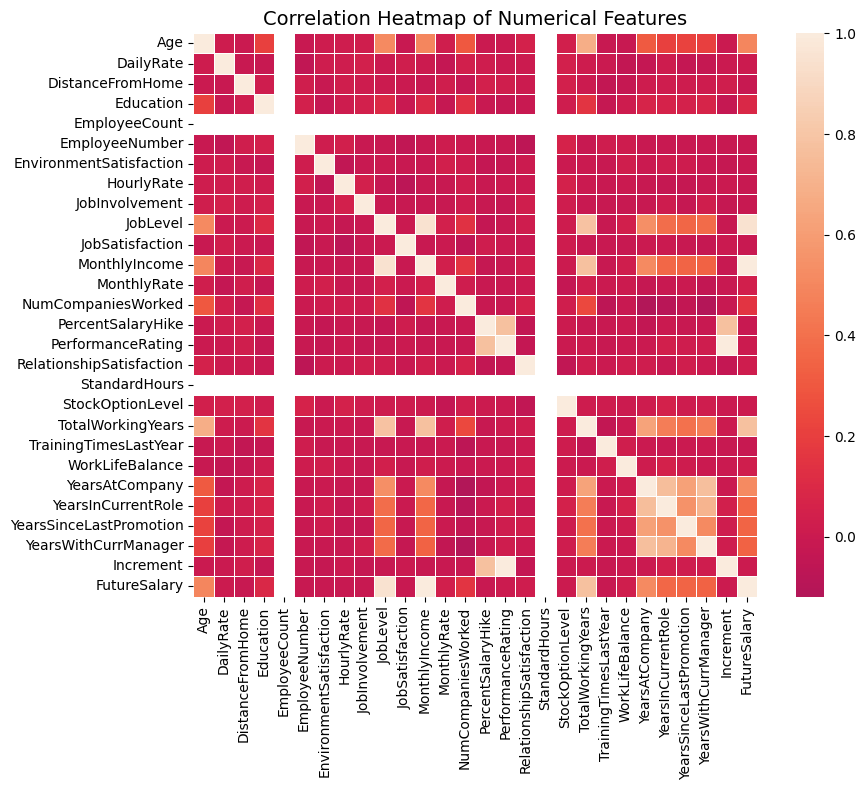

In [42]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=False, cmap='rocket', center=0, linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

In [25]:
# Printing top 5 important features
print("Top 5 Important Features:")
for index, row in top_features.head(5).iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.4f}")

Top 5 Important Features:
- MonthlyIncome: 0.9981
- JobLevel: 0.0013
- PercentSalaryHike: 0.0001
- PerformanceRating: 0.0001
- Increment: 0.0001


# Monthly Income Distribution


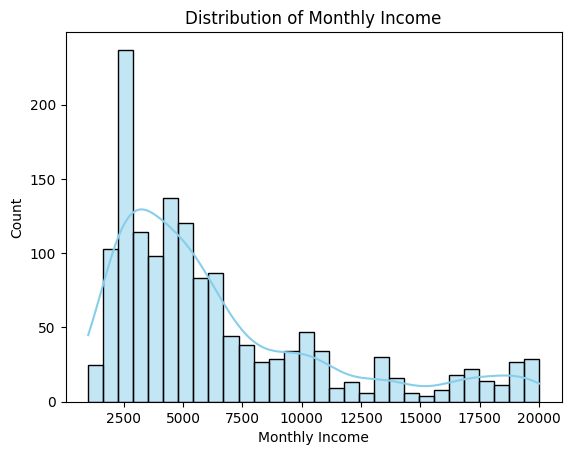

In [41]:
# Monthly Income Distribution
sns.histplot(data=df, x='MonthlyIncome', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

# Initializing and training the Ridge Regression model


In [27]:
# Initializing and training the Ridge Regression model
ridge_model = Ridge(alpha=0.7, random_state=37)
ridge_model.fit(X_train, Y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluating the models
random_forest_r2 = r2_score(Y_test, random_forest_predictions)
ridge_r2 = r2_score(Y_test, ridge_predictions)
random_forest_rmse = np.sqrt(mean_squared_error(Y_test, random_forest_predictions))
ridge_rmse = np.sqrt(mean_squared_error(Y_test, ridge_predictions))

In [31]:
# Determining the better model based on R² score
if random_forest_r2 > ridge_r2:
    better_model = random_forest_model
    better_predictions = random_forest_predictions  # Assign to better_predictions
    better_model_name = "Random Forest"
else:
    better_model = ridge_model
    better_predictions = ridge_predictions  # Assign to better_predictions instead of better_model_predictions
    better_model_name = "Ridge Regression"

# Visualizing Actual vs Predicted Future Salary


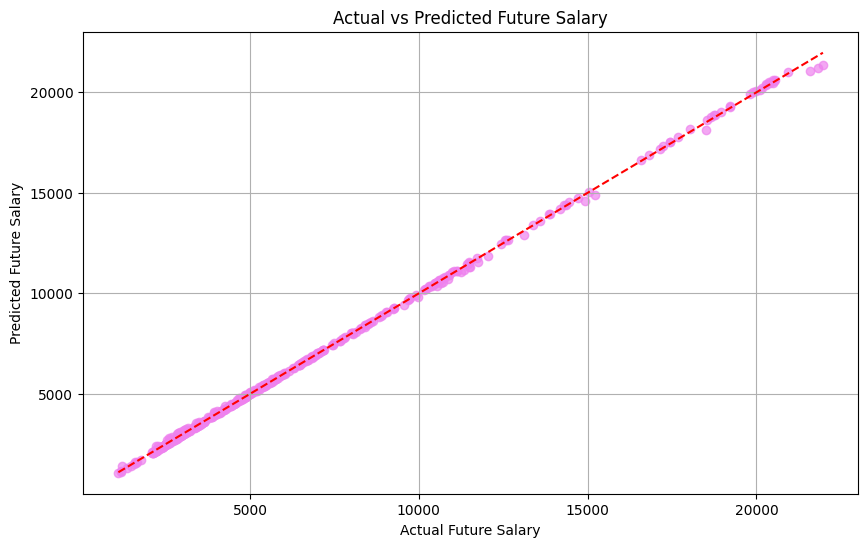

In [32]:
# Visualizing Actual vs Predicted Future Salary
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, better_predictions, alpha=0.7, color='violet')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Future Salary')
plt.ylabel('Predicted Future Salary')
plt.title('Actual vs Predicted Future Salary')
plt.grid(True)
plt.show()

# Q-Q Plot for Residuals


<Figure size 800x600 with 0 Axes>

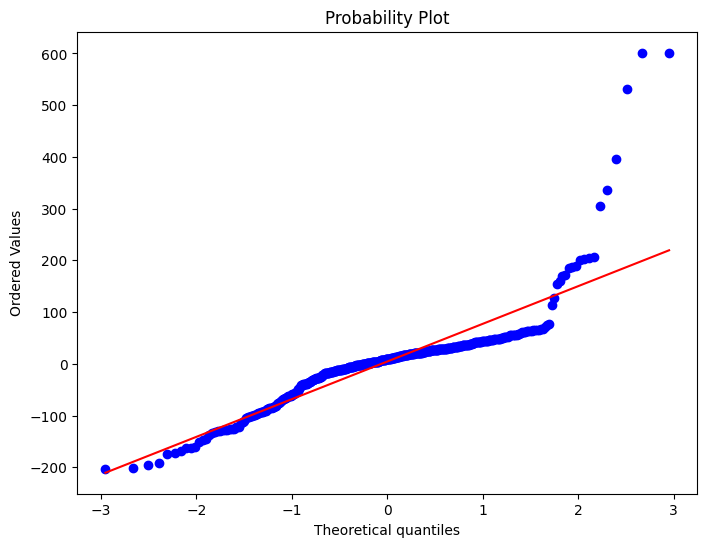

In [34]:
# Q-Q Plot for Residuals
residuals = Y_test - better_predictions
plt.figure(figsize=(8, 6))
fig = plt.figure(figsize=(8, 6)) # Create Q-Q plot
res = stats.probplot(residuals, dist="norm", plot=plt)

# Comparing R² and RMSE


In [46]:
# Comparing R² and RMSE
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Ridge Regression'],
    'R²': [random_forest_r2, ridge_r2],
    'RMSE': [random_forest_rmse, ridge_rmse]
})
model_comparison.set_index('Model', inplace=True)

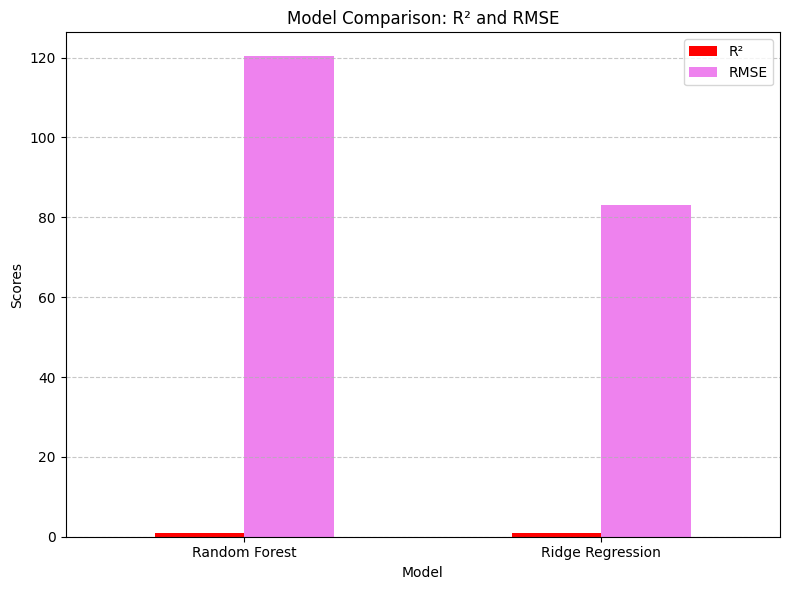

In [40]:
# Plotting as bar chart
fig, ax = plt.subplots(figsize=(8, 6))
model_comparison.plot(kind='bar', ax=ax, color=['red', 'violet'])
plt.title('Model Comparison: R² and RMSE')
plt.ylabel('Scores')
plt.xticks(rotation=0)  # Ensure labels are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Printing performance metrics


In [37]:
#Printing performance metrics
print("\n╔════════════════════════════════════════════════════════════╗")
print("║                    MODEL ACCURACY METRICS                  ║")
print("╚════════════════════════════════════════════════════════════╝")
metrics_df = pd.DataFrame({
    'S.No': [1, 2],
    'Metric': ['R²', 'RMSE'],
    'Random Forest': [random_forest_r2, random_forest_rmse],
    'Ridge Regression': [ridge_r2, ridge_rmse]
})
metrics_df.set_index('S.No', inplace=True)
print(metrics_df)

print(f"\nBetter performing model: {better_model_name}")



╔════════════════════════════════════════════════════════════╗
║                    MODEL ACCURACY METRICS                  ║
╚════════════════════════════════════════════════════════════╝
     Metric  Random Forest  Ridge Regression
S.No                                        
1        R²       0.999364          0.999696
2      RMSE     120.304134         83.140959

Better performing model: Ridge Regression
